## Importing Necessary Libraries: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Collection:

In [2]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## Data Understanding:

### Initial Analysis:

In [3]:
salary_data.shape

(30, 2)

In [4]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
salary_data.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [7]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Histogram and Boxplot:

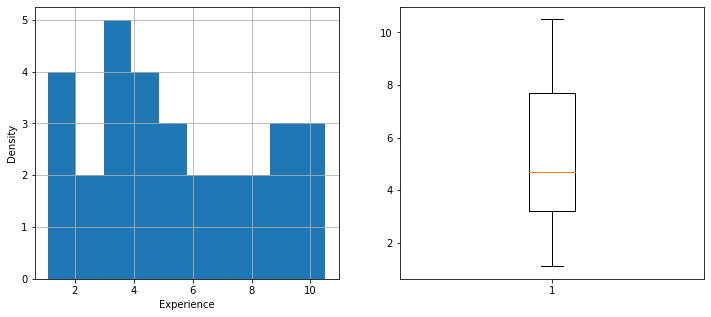

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
salary_data['YearsExperience'].hist()
plt.xlabel('Experience')
plt.ylabel('Density')
plt.subplot(1,2,2)
plt.boxplot(salary_data['YearsExperience'])
plt.show()

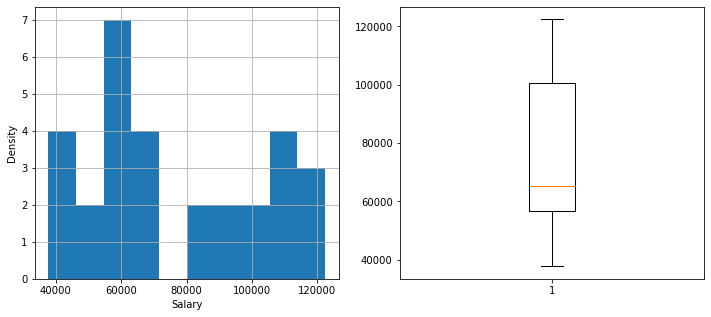

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
salary_data['Salary'].hist()
plt.xlabel('Salary')
plt.ylabel('Density')
plt.subplot(1,2,2)
plt.boxplot(salary_data['Salary'])
plt.show()

### Correlation Matrix:

In [10]:
salary_corr=salary_data.corr()
salary_corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

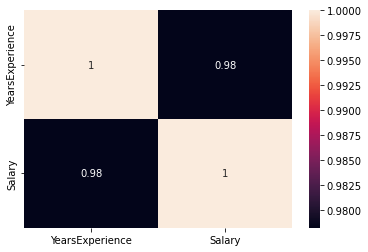

In [11]:
sns.heatmap(salary_corr, annot=True)

### Performing Assumption Checks:

## 1.Linearity:

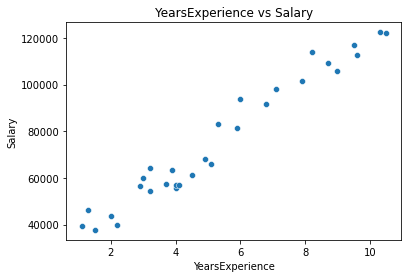

In [12]:
sns.scatterplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title('YearsExperience vs Salary')
plt.show()

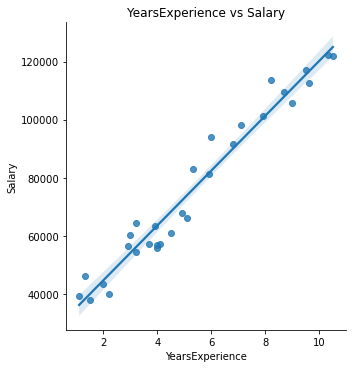

In [13]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title('YearsExperience vs Salary')
plt.show()

## 2.Normality:

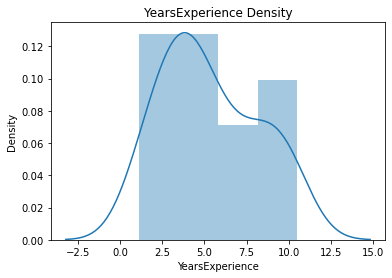

In [14]:
sns.distplot(salary_data['YearsExperience'])
plt.title('YearsExperience Density')
plt.show()

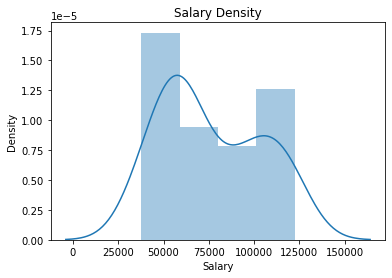

In [15]:
sns.distplot(salary_data['Salary'])
plt.title('Salary Density')
plt.show()

## Data Preparation:

In [16]:
#renaming the column names.
salary_data = salary_data.rename({'YearsExperience':'years_exp','Salary':'salary'},axis=1)
salary_data.head()

,years_exp,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## Building the Model || Training the Model:

In [17]:
import statsmodels.formula.api as smf
linear_model=smf.ols('salary~years_exp',data=salary_data).fit()
linear_model

In [18]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        13:48:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years_exp   9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#coefficient parameters
linear_model.params

Intercept    25792.200199
years_exp     9449.962321
dtype: float64

In [20]:
#p_values
linear_model.pvalues

Intercept    5.511950e-12
years_exp    1.143068e-20
dtype: float64

In [21]:
#tvalues
linear_model.tvalues

Intercept    11.346940
years_exp    24.950094
dtype: float64

In [22]:
#r_sqaured_values and adj_r_squared_values
linear_model.rsquared,linear_model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [23]:
lin_pred=linear_model.predict(salary_data['years_exp'])
lin_pred.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

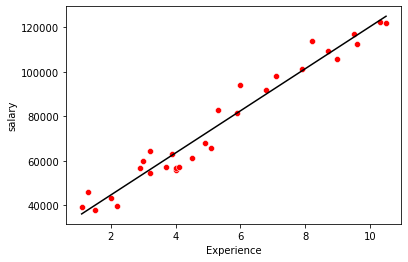

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(salary_data['years_exp'],salary_data['salary'],color='red')
plt.plot(salary_data['years_exp'],lin_pred,color='black')
plt.xlabel('Experience')
plt.ylabel('salary')
plt.show()

In [25]:
lin_pred.corr(salary_data['salary'])        #0.97 correlated

0.9782416184887601

### Logarithmic Transformations:

In [26]:
data1=salary_data

In [27]:
data1['salary']=np.log(data1['salary'])
data1['years_exp']=np.log(data1['years_exp'])

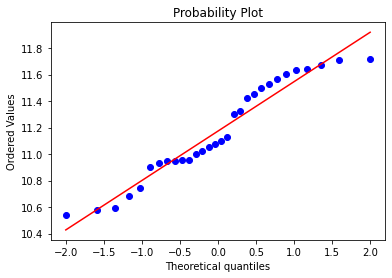

In [28]:
stats.probplot(data1['salary'],dist='norm',plot=plt)
plt.show()

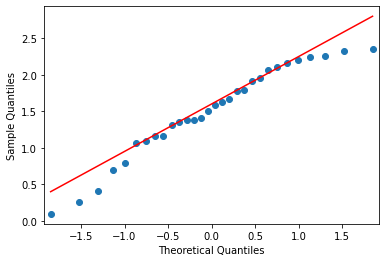

In [29]:
sm.qqplot(data1['years_exp'],line='q')
plt.show()

In [30]:
log_model=smf.ols('salary~years_exp',data=data1).fit()
log_model

In [31]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           7.40e-16
Time:                        13:48:33   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
years_exp      0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
log_pred=log_model.predict(salary_data['years_exp'])
log_pred.head()

0    10.381616
1    10.475515
2    10.555951
3    10.717653
4    10.771226
dtype: float64

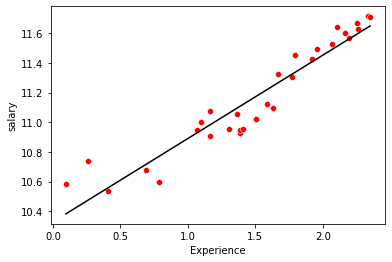

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(salary_data['years_exp'],salary_data['salary'],color='red')
plt.plot(salary_data['years_exp'],log_pred,color='black')
plt.xlabel('Experience')
plt.ylabel('salary')
plt.show()

In [34]:
log_pred.corr(salary_data['salary'])      #0.95 correlated

0.9514279124461902

## Squareroot transformation:

In [35]:
sq_data=salary_data

In [36]:
sq_data['salary']=np.sqrt(sq_data['salary'])
sq_data['years_exp']=np.sqrt(sq_data['years_exp'])

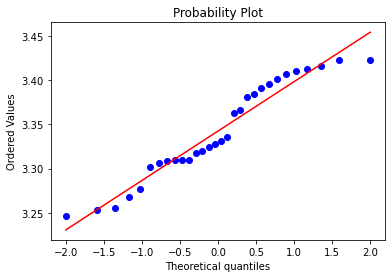

In [37]:
stats.probplot(sq_data['salary'],dist='norm',plot=plt)
plt.show()

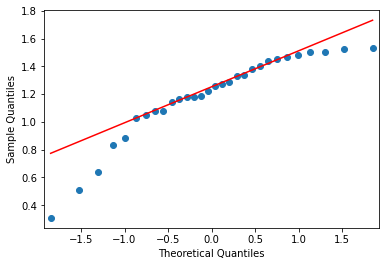

In [38]:
sm.qqplot(sq_data['years_exp'],line='q')
plt.show()

In [39]:
sq_model=smf.ols('salary~years_exp',data=sq_data).fit()
sq_model

In [40]:
sq_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           1.69e-11
Time:                        13:48:35   Log-Likelihood:                 69.495
No. Observations:                  30   AIC:                            -135.0
Df Residuals:                      28   BIC:                            -132.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1491      0.018    170.845      0.000       3.111       3.187
years_exp      0.1624      0.015     10.808      0.000       0.132       0.193
==============================================================================
Omnibus:                        1.065   Durbin-Watson:                   0.536
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                0.944
Skew:                           0.215   Prob(JB):                        0.624
Kurtosis:                       2.245   Cond. No.                         8.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
sq_pred=sq_model.predict(salary_data['years_exp'])
sq_pred.head()

0    3.199280
1    3.232325
2    3.252550
3    3.284345
4    3.293341
dtype: float64

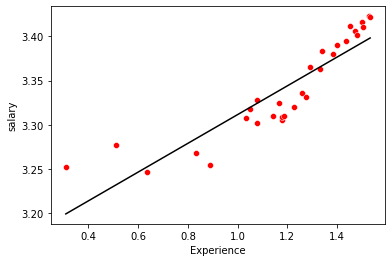

In [42]:
plt.figure(figsize=(6,4))
sns.scatterplot(salary_data['years_exp'],salary_data['salary'],color='red')
plt.plot(salary_data['years_exp'],sq_pred,color='black')
plt.xlabel('Experience')
plt.ylabel('salary')
plt.show()

In [43]:
sq_pred.corr(salary_data['salary'])      #0.95 correlated

0.8981312175797058

## 3. Exponential Transformation:

In [44]:
exp_data=salary_data

In [45]:
exp_data['salary']=np.exp(exp_data['salary'])
exp_data['years_exp']=np.exp(exp_data['years_exp'])

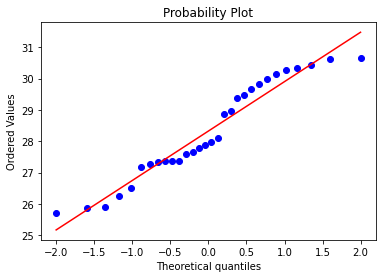

In [46]:
stats.probplot(exp_data['salary'],dist='norm',plot=plt)
plt.show()

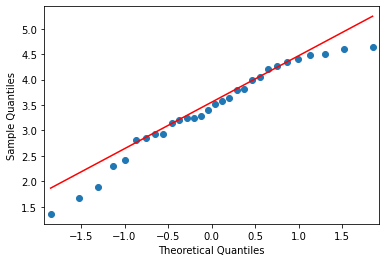

In [47]:
sm.qqplot(exp_data['years_exp'],line='q')
plt.show()

In [48]:
exp_model=smf.ols('salary~years_exp',data=exp_data).fit()
exp_model

In [49]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     250.9
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           1.66e-15
Time:                        13:48:37   Log-Likelihood:                -20.930
No. Observations:                  30   AIC:                             45.86
Df Residuals:                      28   BIC:                             48.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6065      0.373     60.671      0.000      21.843      23.370
years_exp      1.6728      0.106     15.839      0.000       1.456       1.889
==============================================================================
Omnibus:                        0.206   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.383
Skew:                           0.146   Prob(JB):                        0.826
Kurtosis:                       2.530   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
exp_pred=exp_model.predict(salary_data['years_exp'])
exp_pred.head()

0    24.884286
1    25.398325
2    25.768617
3    26.452505
4    26.671572
dtype: float64

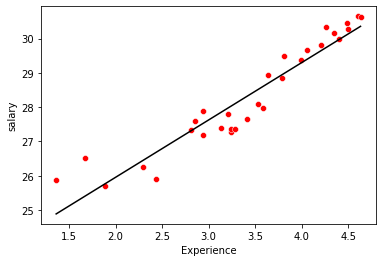

In [51]:
plt.figure(figsize=(6,4))
sns.scatterplot(salary_data['years_exp'],salary_data['salary'],color='red')
plt.plot(salary_data['years_exp'],exp_pred,color='black')
plt.xlabel('Experience')
plt.ylabel('salary')
plt.show()

In [52]:
exp_pred.corr(salary_data['salary'])      #0.95 correlated

0.9484694679043568

In [54]:
print('            Linear model              :', linear_model.rsquared)

print('Logarithmic Transformation log model  :', log_model.rsquared)
print('Squareroot Transformation  sq_model   :', sq_model.rsquared)
print('Exponential Transformation exp model  :', exp_model.rsquared)

            Linear model              : 0.9569566641435086
Logarithmic Transformation log model  : 0.9052150725817149
Squareroot Transformation  sq_model   : 0.8066396839912041
Exponential Transformation exp model  : 0.8995943315467732


### Out of these models, 1st linear model is best as it has better R-sqaured value 0.956

## ========================================================================